# AP 1 - Humberto Chaves (218060062) e Layla Sampaio (119060009)

Preparandinho o terreno: nessa primeira parte, estamos importando tudo que será relevante para nosso trabalho.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
import matplotlib.pyplot as plt
import random as rnd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

### Roteiro da nossa análise:
Para começo de conversa, vamos começar buscando *missing values*. Depois, vamos fazer a redução de características para tornar a análise mais prática. Em sequência, buscaremos *outliers*.

## Dataset 1

### Informações básicas


Nessa primeira parte, estamos importando o dataset que colocamos na pasta "sample_data" e vendo seu formato, suas 5 primeiras linhas, informações sobre ele e se temos algum valor duplicado.

In [ ]:
dataset = pd.read_csv('sample_data/UFFdatasetLab1.csv')

Nosso primeiro dataset tem 856 linhas e 33 colunas.

In [ ]:
dataset.shape

(856, 33)

In [ ]:
dataset.head()

,WBN_GC_L_0.25,WBN_GC_H_0.25,WBN_GC_L_0.50,WBN_GC_H_0.50,WBN_GC_L_0.75,WBN_GC_H_0.75,WBN_GC_L_1.00,WBN_GC_H_1.00,WBN_EN_L_0.25,WBN_EN_H_0.25,WBN_EN_L_0.50,WBN_EN_H_0.50,WBN_EN_L_0.75,WBN_EN_H_0.75,WBN_EN_L_1.00,WBN_EN_H_1.00,WBN_LP_L_0.25,WBN_LP_H_0.25,WBN_LP_L_0.50,WBN_LP_H_0.50,WBN_LP_L_0.75,WBN_LP_H_0.75,WBN_LP_L_1.00,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,-2.3941,1.8819,-2.5208,2.3536,-2.7698,3.1048,-3.4568,3.9734,-0.8412,1.2385,-1.7103,2.0127,-2.5874,2.8944,-3.4677,3.7962,-0.8850,1.1079,-1.6940,1.9939,-2.5592,2.8987,-3.4355,3.8086,4.924,60.45,6,4,1,362.857,1,0,Active
1,-2.3342,2.3811,-2.6012,2.7420,-3.0632,3.4052,-3.7360,4.2833,-0.8664,2.4012,-1.7694,2.6741,-2.6826,3.1567,-3.6000,4.0094,-0.9068,1.1629,-1.7613,2.0906,-2.6669,3.0370,-3.5822,3.9886,4.954,50.44,2,2,1,320.266,1,0,Active
2,-1.4709,2.0782,-1.8538,2.4877,-2.4116,3.0664,-3.1338,3.8454,-0.7940,1.2701,-1.5962,2.0100,-2.4012,2.8430,-3.2077,3.7018,-0.8780,1.0694,-1.6188,1.8963,-2.3950,2.7538,-3.1842,3.6222,1.399,103.22,3,6,1,376.459,0,1,Active
3,-1.4722,1.9812,-1.7911,2.3885,-2.4193,2.9938,-3.2212,3.8043,-0.8036,1.2421,-1.6093,1.9642,-2.4159,2.8119,-3.2230,3.6865,-0.9124,1.1344,-1.5729,1.9904,-2.2973,2.8646,-3.0552,3.7461,4.721,137.73,7,6,3,442.581,0,0,Active
4,-2.2448,1.9814,-2.3705,2.3951,-2.6219,3.0475,-3.1991,3.8418,-0.7988,1.2426,-1.5995,1.9529,-2.4012,2.7843,-3.2035,3.6445,-0.8770,1.1364,-1.5570,1.9837,-2.2671,2.8460,-3.0147,3.7151,3.912,120.94,7,6,2,401.484,0,0,Active


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WBN_GC_L_0.25  856 non-null    float64
 1   WBN_GC_H_0.25  856 non-null    float64
 2   WBN_GC_L_0.50  856 non-null    float64
 3   WBN_GC_H_0.50  856 non-null    float64
 4   WBN_GC_L_0.75  856 non-null    float64
 5   WBN_GC_H_0.75  856 non-null    float64
 6   WBN_GC_L_1.00  856 non-null    float64
 7   WBN_GC_H_1.00  856 non-null    float64
 8   WBN_EN_L_0.25  856 non-null    float64
 9   WBN_EN_H_0.25  856 non-null    float64
 10  WBN_EN_L_0.50  856 non-null    float64
 11  WBN_EN_H_0.50  856 non-null    float64
 12  WBN_EN_L_0.75  856 non-null    float64
 13  WBN_EN_H_0.75  856 non-null    float64
 14  WBN_EN_L_1.00  856 non-null    float64
 15  WBN_EN_H_1.00  856 non-null    float64
 16  WBN_LP_L_0.25  856 non-null    float64
 17  WBN_LP_H_0.25  856 non-null    float64
 18  WBN_LP_L_0

Aqui podemos ver que não temos valores duplicados no dataset

In [ ]:
dataset.duplicated().value_counts()

False    856
dtype: int64

### Busca por *missing values*

Aqui, vamos procurar e plotar valores nulos. A função *isna()* (is not available) retorna os valores ausentes no nosso dataset. Fizemos a aplicação da função *sum()* para ver o total de valores faltantes em cada coluna. Como não tivemos nenhum, nossa análise se tornou um pouco mais simples, pois não precisaremos tratá-los.

In [ ]:
dataset.isna().sum()

WBN_GC_L_0.25    0
WBN_GC_H_0.25    0
WBN_GC_L_0.50    0
WBN_GC_H_0.50    0
WBN_GC_L_0.75    0
WBN_GC_H_0.75    0
WBN_GC_L_1.00    0
WBN_GC_H_1.00    0
WBN_EN_L_0.25    0
WBN_EN_H_0.25    0
WBN_EN_L_0.50    0
WBN_EN_H_0.50    0
WBN_EN_L_0.75    0
WBN_EN_H_0.75    0
WBN_EN_L_1.00    0
WBN_EN_H_1.00    0
WBN_LP_L_0.25    0
WBN_LP_H_0.25    0
WBN_LP_L_0.50    0
WBN_LP_H_0.50    0
WBN_LP_L_0.75    0
WBN_LP_H_0.75    0
WBN_LP_L_1.00    0
WBN_LP_H_1.00    0
XLogP            0
PSA              0
NumRot           0
NumHBA           0
NumHBD           0
MW               0
BBB              0
BadGroup         0
Outcome          0
dtype: int64

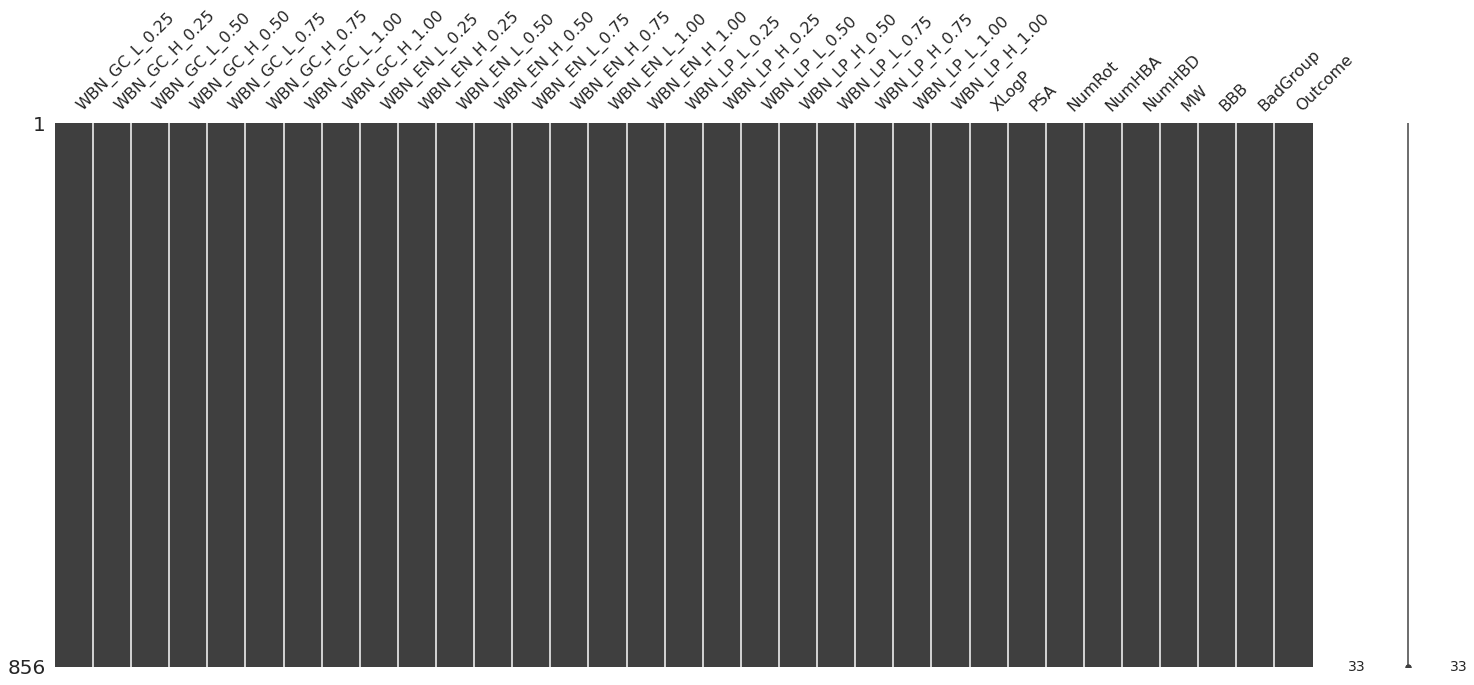

In [ ]:
msno.matrix(dataset)

### Redução de caracteristicas

In [ ]:
X=dataset.iloc[:,0:32]
y=dataset.iloc[:,32]
print(X.shape,y.shape)

(856, 32) (856,)


In [ ]:
X.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WBN_GC_L_0.25  856 non-null    float64
 1   WBN_GC_H_0.25  856 non-null    float64
 2   WBN_GC_L_0.50  856 non-null    float64
 3   WBN_GC_H_0.50  856 non-null    float64
 4   WBN_GC_L_0.75  856 non-null    float64
 5   WBN_GC_H_0.75  856 non-null    float64
 6   WBN_GC_L_1.00  856 non-null    float64
 7   WBN_GC_H_1.00  856 non-null    float64
 8   WBN_EN_L_0.25  856 non-null    float64
 9   WBN_EN_H_0.25  856 non-null    float64
 10  WBN_EN_L_0.50  856 non-null    float64
 11  WBN_EN_H_0.50  856 non-null    float64
 12  WBN_EN_L_0.75  856 non-null    float64
 13  WBN_EN_H_0.75  856 non-null    float64
 14  WBN_EN_L_1.00  856 non-null    float64
 15  WBN_EN_H_1.00  856 non-null    float64
 16  WBN_LP_L_0.25  856 non-null    float64
 17  WBN_LP_H_0.25  856 non-null    float64
 18  WBN_LP_L_0

In [ ]:
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("Num features: %s" % (fit.n_features_))
print("Features selecionadas : %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num features: 16
Features selecionadas : [ True  True False  True  True False  True False False  True False  True
 False False False False  True False  True False  True False  True  True
  True False  True False  True False False  True]
Feature Ranking: [ 1  1  6  1  1 15  1 14 10  1  9  1  7  4  3  8  1  2  1 13  1 17  1  1
  1 12  1  5  1 16 11  1]


Aqui temos nosso novo dataset sem as colunas descartadas pelo RFE. Podemos perceber que tivemos uma redução pela metade no número de colunas.

In [ ]:
filtro = np.where(fit.support_)[0]
nds = pd.read_csv('sample_data/UFFdatasetLab1.csv',usecols=filtro)
nds.head()
nds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WBN_GC_L_0.25  856 non-null    float64
 1   WBN_GC_H_0.25  856 non-null    float64
 2   WBN_GC_H_0.50  856 non-null    float64
 3   WBN_GC_L_0.75  856 non-null    float64
 4   WBN_GC_L_1.00  856 non-null    float64
 5   WBN_EN_H_0.25  856 non-null    float64
 6   WBN_EN_H_0.50  856 non-null    float64
 7   WBN_LP_L_0.25  856 non-null    float64
 8   WBN_LP_L_0.50  856 non-null    float64
 9   WBN_LP_L_0.75  856 non-null    float64
 10  WBN_LP_L_1.00  856 non-null    float64
 11  WBN_LP_H_1.00  856 non-null    float64
 12  XLogP          856 non-null    float64
 13  NumRot         856 non-null    int64  
 14  NumHBD         856 non-null    int64  
 15  BadGroup       856 non-null    int64  
dtypes: float64(13), int64(3)
memory usage: 107.1 KB


A partir de agora, vamos trabalhar com nosso novo data set *nds*, que é a versão reduzida do dataset original.

### Outliers

Vamos analisar os outliers de cada coluna.

In [ ]:
column0 = nds['WBN_GC_L_0.25']
column1 = nds['WBN_GC_H_0.25']
column2 = nds['WBN_GC_H_0.50']
column3 = nds['WBN_GC_L_0.75']
column4 = nds['WBN_GC_L_1.00']
column5 = nds['WBN_EN_H_0.25']
column6 = nds['WBN_EN_H_0.50']
column7 = nds['WBN_LP_L_0.25']
column8 = nds['WBN_LP_L_0.50']
column9 = nds['WBN_LP_L_0.75']
column10 = nds['WBN_LP_L_1.00']
column11 = nds['WBN_LP_H_1.00']
column12 = nds['XLogP']
column13 = nds['NumRot']
column14 = nds['NumHBD']
column15 = nds['BadGroup']

#### Plotando gráficos

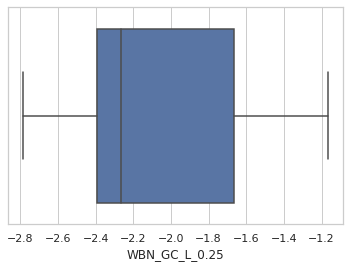

In [ ]:
sns.boxplot(x=nds['WBN_GC_L_0.25']) #coluna 0

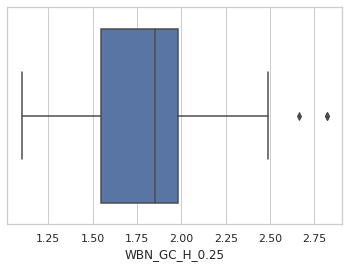

In [ ]:
sns.boxplot(x=nds['WBN_GC_H_0.25']) # coluna 1

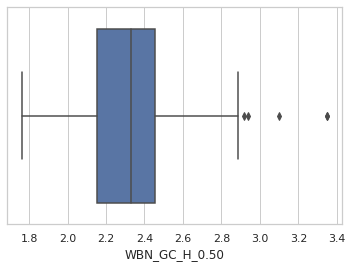

In [ ]:
sns.boxplot(x=nds['WBN_GC_H_0.50']) # coluna 2

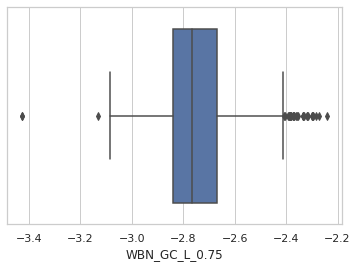

In [ ]:
sns.boxplot(x=nds['WBN_GC_L_0.75']) # coluna

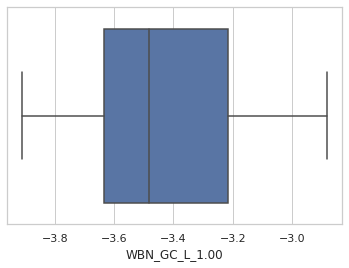

In [ ]:
sns.boxplot(x=nds['WBN_GC_L_1.00']) # coluna 4

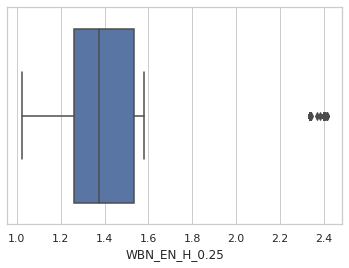

In [ ]:
sns.boxplot(x=nds['WBN_EN_H_0.25']) # coluna 5

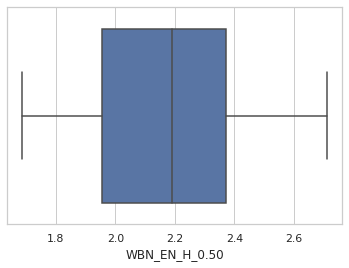

In [ ]:
sns.boxplot(x=nds['WBN_EN_H_0.50']) # coluna 6

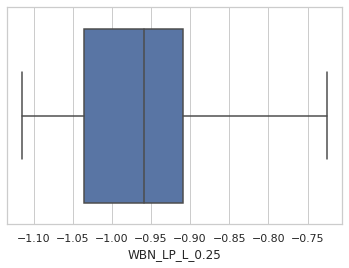

In [ ]:
sns.boxplot(x=nds['WBN_LP_L_0.25']) # coluna 7

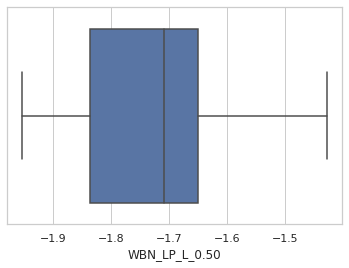

In [ ]:
sns.boxplot(x=nds['WBN_LP_L_0.50']) # coluna 8

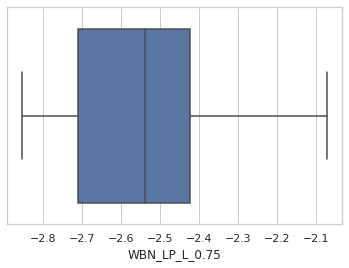

In [ ]:
sns.boxplot(x=nds['WBN_LP_L_0.75']) # coluna 9

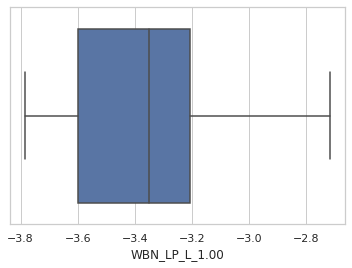

In [ ]:
sns.boxplot(x=nds['WBN_LP_L_1.00']) # coluna 10

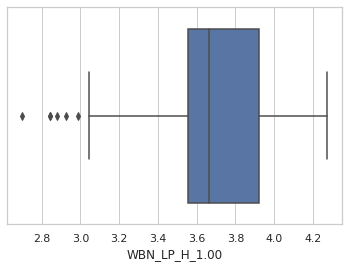

In [ ]:
sns.boxplot(x=nds['WBN_LP_H_1.00']) # coluna 11

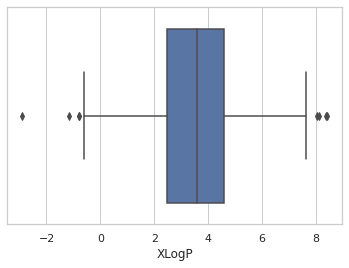

In [ ]:
sns.boxplot(x=nds['XLogP']) # coluna 12

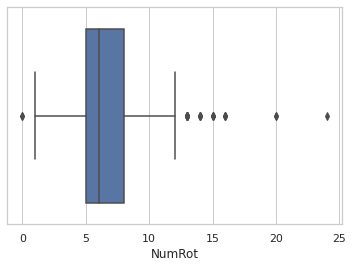

In [ ]:
sns.boxplot(x=nds['NumRot']) # coluna 13

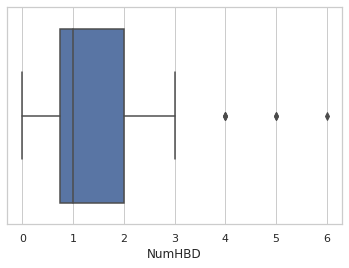

In [ ]:
sns.boxplot(x=nds['NumHBD']) # coluna 14

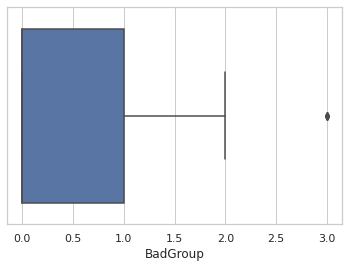

In [ ]:
sns.boxplot(x=nds['BadGroup']) # coluna 15

Observando os gráficos, pudemos perceber que somente as colunas 1, 2, 3, 5, 11, 12, 13, 14 e 15 apresentam *outliers*. Vamos removê-los usando o método IQR.

#### Removendo outliers

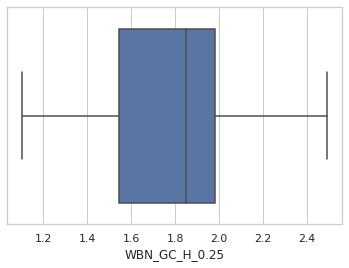

In [ ]:
# coluna 1
Q1=column1.quantile(0.25)
Q3=column1.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column1 = column1[~((column1 < lowqe_bound) |(column1 > upper_bound))]
sns.boxplot(x=IQR_column1)

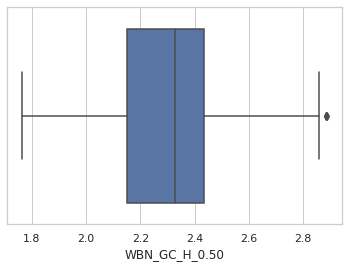

In [ ]:
# coluna 2
Q1=column2.quantile(0.25)
Q3=column2.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column2 = column2[~((column2 < lowqe_bound) |(column2 > upper_bound))]
sns.boxplot(x=IQR_column2)

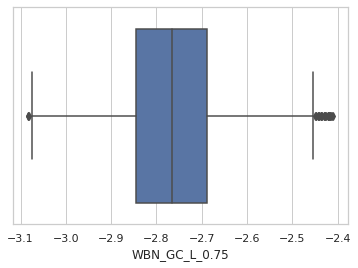

In [ ]:
# coluna 3
Q1=column3.quantile(0.25)
Q3=column3.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column3 = column3[~((column3 < lowqe_bound) |(column3 > upper_bound))]
sns.boxplot(x=IQR_column3)

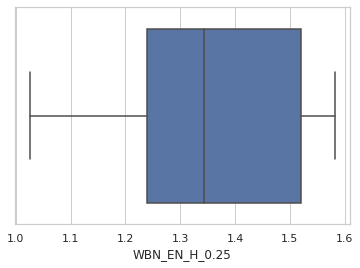

In [ ]:
# coluna 5
Q1=column5.quantile(0.25)
Q3=column5.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column5 = column5[~((column5 < lowqe_bound) |(column5 > upper_bound))]
sns.boxplot(x=IQR_column5)

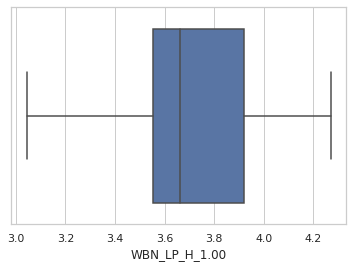

In [ ]:
# coluna 11
Q1=column11.quantile(0.25)
Q3=column11.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column11 = column11[~((column11 < lowqe_bound) |(column11 > upper_bound))]
sns.boxplot(x=IQR_column11)

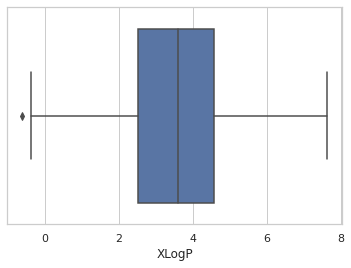

In [ ]:
# coluna 12
Q1=column12.quantile(0.25)
Q3=column12.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column12 = column12[~((column12 < lowqe_bound) |(column12 > upper_bound))]
sns.boxplot(x=IQR_column12)

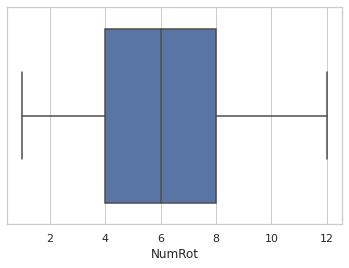

In [ ]:
# coluna 13
Q1=column13.quantile(0.25)
Q3=column13.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column13 = column13[~((column13 < lowqe_bound) |(column13 > upper_bound))]
sns.boxplot(x=IQR_column13)

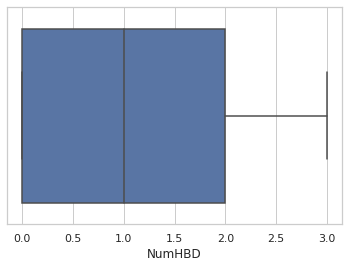

In [ ]:
# coluna 14
Q1=column14.quantile(0.25)
Q3=column14.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column14 = column14[~((column14 < lowqe_bound) |(column14 > upper_bound))]
sns.boxplot(x=IQR_column14)

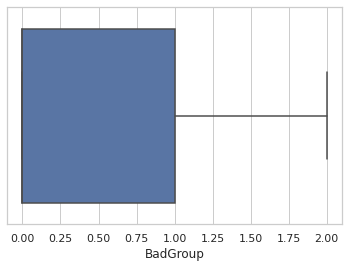

In [ ]:
# coluna 15
Q1=column15.quantile(0.25)
Q3=column15.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_column15 = column15[~((column15 < lowqe_bound) |(column15> upper_bound))]
sns.boxplot(x=IQR_column15)

Podemos observar que alguns outliers (colunas 2, 3 e 12) não foram removidos usando a técnica IQR, então tentaremos usar a Z-Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


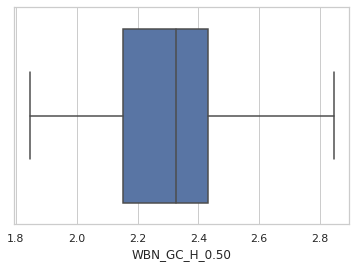

In [ ]:
# coluna 2
z=np.abs(stats.zscore(column2))
threshold = 2.2
z_column2=column2[(z < threshold)]
sns.boxplot(z_column2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


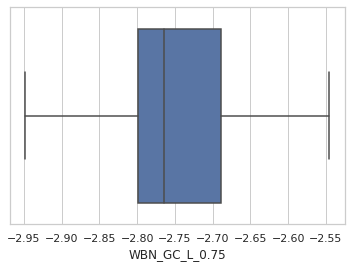

In [ ]:
# coluna 3
z=np.abs(stats.zscore(column3))
threshold = 1.3
z_column3=column3[(z < threshold)]
sns.boxplot(z_column3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


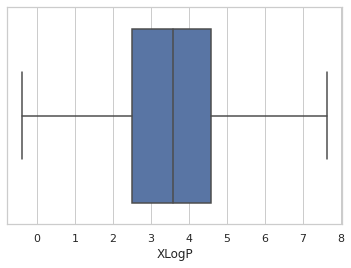

In [ ]:
# coluna 12
z=np.abs(stats.zscore(column12))
threshold = 2.7
z_column12=column12[(z < threshold)]
sns.boxplot(z_column12)

### Outras considerações

Apesar de não conhecermos bem o conjunto de dados oferecido pelo professor, é possível perceber algumas características específicas de algumas colunas, como a *BBB*, *BadGroup* e *Outcome*

##### BBB

A coluna *BBB* parece tratar de algo em binário.

In [ ]:
BBB = dataset['BBB']
BBB.groupby(BBB).count()

BBB
0    617
1    239
Name: BBB, dtype: int64

Text(0.5, 1.0, 'BBB')

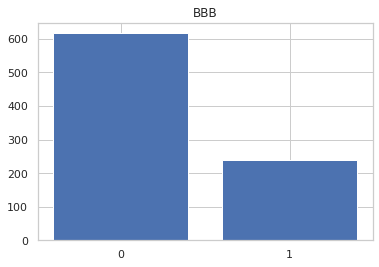

In [ ]:
BBB_sum = BBB.value_counts()
BBB_sum = BBB_sum.sort_index()
plt.bar(BBB_sum.index, BBB_sum)
plt.xticks(BBB_sum.index)
plt.title('BBB')

Há uma presença consideravelmente maior de estados 0 do que de estados 1 na nossa base de dados. Mesmo sem conhecer bem a base de dados, podemos relacionar colunas do nosso dataset com a *BBB*, como, por exemplo, a coluna *PSA*

In [ ]:
estados = dataset['BBB']
estado0 = dataset[dataset['BBB'] == 0]
estado1 = dataset[dataset['BBB'] == 1]

In [ ]:
print(estado0.mean())

WBN_GC_L_0.25     -2.088617
WBN_GC_H_0.25      1.814625
WBN_GC_L_0.50     -2.315379
WBN_GC_H_0.50      2.336412
WBN_GC_L_0.75     -2.748706
WBN_GC_H_0.75      3.082793
WBN_GC_L_1.00     -3.414406
WBN_GC_H_1.00      3.914493
WBN_EN_L_0.25     -0.781116
WBN_EN_H_0.25      1.520022
WBN_EN_L_0.50     -1.589852
WBN_EN_H_0.50      2.209343
WBN_EN_L_0.75     -2.414584
WBN_EN_H_0.75      3.006854
WBN_EN_L_1.00     -3.247492
WBN_EN_H_1.00      3.868071
WBN_LP_L_0.25     -0.986126
WBN_LP_H_0.25      1.117589
WBN_LP_L_0.50     -1.758860
WBN_LP_H_0.50      1.943934
WBN_LP_L_0.75     -2.574949
WBN_LP_H_0.75      2.810868
WBN_LP_L_1.00     -3.405159
WBN_LP_H_1.00      3.691407
XLogP              3.243817
PSA              100.188201
NumRot             7.299838
NumHBA             6.215559
NumHBD             1.272285
MW               435.246838
BBB                0.000000
BadGroup           0.583468
dtype: float64


In [ ]:
print(estado1.mean())

WBN_GC_L_0.25     -2.068696
WBN_GC_H_0.25      1.743419
WBN_GC_L_0.50     -2.322960
WBN_GC_H_0.50      2.316884
WBN_GC_L_0.75     -2.787956
WBN_GC_H_0.75      3.085203
WBN_GC_L_1.00     -3.454173
WBN_GC_H_1.00      3.931510
WBN_EN_L_0.25     -0.809579
WBN_EN_H_0.25      1.551144
WBN_EN_L_0.50     -1.642200
WBN_EN_H_0.50      2.187302
WBN_EN_L_0.75     -2.485153
WBN_EN_H_0.75      2.953795
WBN_EN_L_1.00     -3.332807
WBN_EN_H_1.00      3.813720
WBN_LP_L_0.25     -0.925617
WBN_LP_H_0.25      1.185280
WBN_LP_L_0.50     -1.678015
WBN_LP_H_0.50      2.017377
WBN_LP_L_0.75     -2.498949
WBN_LP_H_0.75      2.895115
WBN_LP_L_1.00     -3.338436
WBN_LP_H_1.00      3.786116
XLogP              4.344510
PSA               57.249749
NumRot             4.953975
NumHBA             4.163180
NumHBD             0.635983
MW               371.331941
BBB                1.000000
BadGroup           0.343096
dtype: float64


Text(0.5, 1.0, 'Comparação entre os valores de PSA para cada estado 0 ou 1 de BBB')

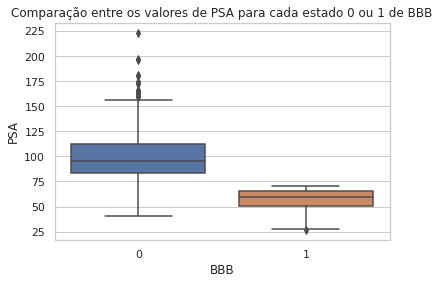

In [ ]:
comparacao = sns.boxplot(x=dataset['BBB'], y=dataset['PSA'])
comparacao.set_title('Comparação entre os valores de PSA para cada estado 0 ou 1 de BBB')

É possível perceber que os valores para o estado 0 são drásticamente maiores que os valores para o estado 1 de BBB em PSA.

##### BadGroup

In [ ]:
badgroup = dataset['BadGroup']
badgroup.groupby(badgroup).count()

BadGroup
0    501
1    274
2     75
3      6
Name: BadGroup, dtype: int64

Ao fazer uma contagem na coluna *BadGroup*, percebemos que ela é composta por 4 atributos que variam de 0 a 4, como se fossem tipos ou classes de alguma coisa.

Text(0.5, 1.0, 'BadGroup')

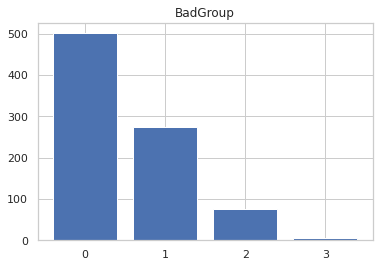

In [ ]:
badgroup_sum = badgroup.value_counts()
badgroup_sum = badgroup_sum.sort_index()
plt.bar(badgroup_sum.index,badgroup_sum)
plt.xticks(badgroup_sum.index)
plt.title('BadGroup')

Classificações do tipo 0 são disparadas as mais presentes, enquanto classificações do tipo 3 são raríssimas

##### Outcome

A classe outcome aparenta tratar sobre status de atividade e inatividade. Vamos analisar essa coluna.

In [ ]:
outcome = dataset['Outcome']
outcome.groupby(outcome).count()

Outcome
Active       12
Inactive    844
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Outcome')

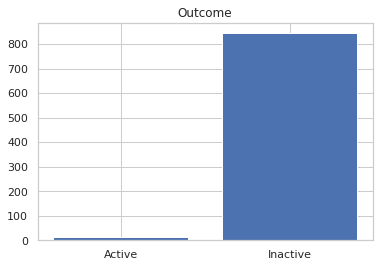

In [ ]:
outcome_sum = outcome.value_counts()
outcome_sum = outcome_sum.sort_index()
plt.bar(outcome_sum.index, outcome_sum)
plt.xticks(outcome_sum.index)
plt.title('Outcome')

Podemos perceber uma gigantesca diferença entre o número de outcomes ativos e o número de outcomes inativos do nosso dataset.

.













.




## Dataset 2

### Informações básicas


Nessa primeira parte, estamos importando o dataset que colocamos na pasta "sample_data" e vendo seu formato, suas 5 primeiras linhas, informações sobre ele e se temos algum valor duplicado.

In [ ]:
dataframe = pd.read_csv('sample_data/UFFdatasetLab2.csv', na_values='?')

Nosso primeiro dataset tem 1000 linhas e 21 colunas.

In [ ]:
dataframe.shape

(1000, 21)

In [ ]:
dataframe.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,'critical/other existing credit',radio/tv,1169.0,NaN,>=7,4.0,'male single',none,4.0,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,NaN,radio/tv,5951.0,<100,1<=X<4,2.0,'female div/dep/mar',none,2.0,'real estate',NaN,none,own,1.0,skilled,1.0,none,yes,bad
2,'no checking',12.0,'critical/other existing credit',NaN,2096.0,<100,4<=X<7,2.0,'male single',none,3.0,'real estate',49.0,none,own,1.0,'unskilled resident',2.0,none,yes,bad
3,<0,42.0,'existing paid',furniture/equipment,7882.0,<100,4<=X<7,2.0,'male single',guarantor,4.0,'life insurance',45.0,none,'for free',1.0,skilled,2.0,none,yes,good
4,NaN,24.0,'delayed previously','new car',4870.0,<100,1<=X<4,3.0,'male single',none,4.0,'no known property',53.0,none,NaN,2.0,NaN,2.0,NaN,NaN,bad


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         890 non-null    object 
 1   duration                885 non-null    float64
 2   credit_history          899 non-null    object 
 3   purpose                 892 non-null    object 
 4   credit_amount           905 non-null    float64
 5   savings_status          911 non-null    object 
 6   employment              896 non-null    object 
 7   installment_commitment  896 non-null    float64
 8   personal_status         906 non-null    object 
 9   other_parties           902 non-null    object 
 10  residence_since         903 non-null    float64
 11  property_magnitude      909 non-null    object 
 12  age                     910 non-null    float64
 13  other_payment_plans     892 non-null    object 
 14  housing                 898 non-null    o

Aqui, vemos que não temos valores duplicados.

In [ ]:
dataframe.duplicated().value_counts()

False    1000
dtype: int64

### Busca por *missing values*

Aqui, vamos procurar e plotar valores nulos. A função *isna()* (is not available) retorna os valores ausentes no nosso dataset. Fizemos a aplicação da função *sum()* para ver o total de valores faltantes em cada coluna. Neste caso, podemos ver que temos valores faltantes em praticamente todas as colunas do dataset.

In [ ]:
dataframe.isna().sum()

checking_status           110
duration                  115
credit_history            101
purpose                   108
credit_amount              95
savings_status             89
employment                104
installment_commitment    104
personal_status            94
other_parties              98
residence_since            97
property_magnitude         91
age                        90
other_payment_plans       108
housing                   102
existing_credits          101
job                        92
num_dependents            117
own_telephone             103
foreign_worker            122
class                       0
dtype: int64

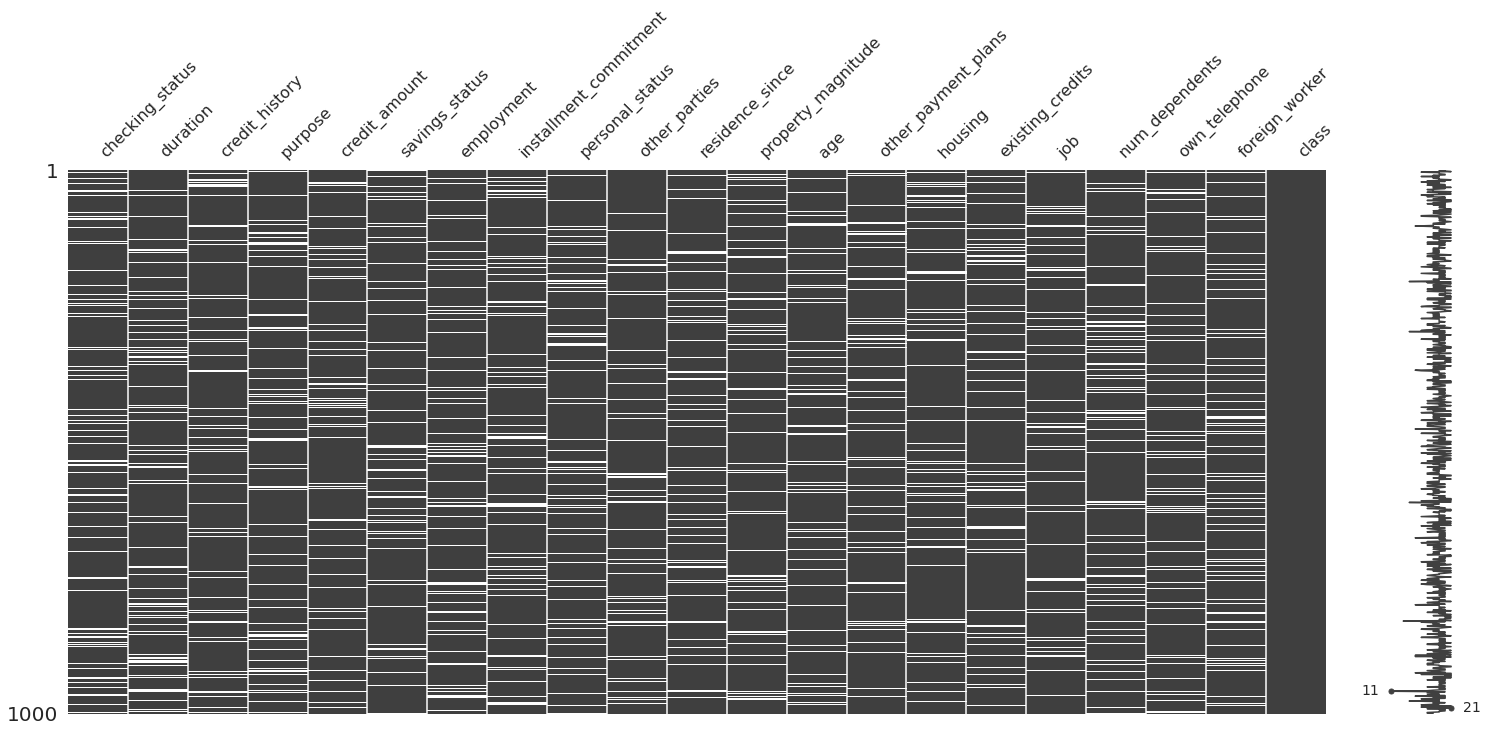

In [ ]:
msno.matrix(dataframe)

No gráfico acima, podemos observar visualmente o que foi mostrado pela linha de codigo:

```
dataframe.isna().sum()
```
Somente a coluna *class* não tem valores faltantes, enquanto todas as outras apresentam. Por causa disso, não corremos o risco de ter linhas inteiras com valores faltantes, mas vamos fazer uma verificação de qualquer linha nula que for encontrada em nossso dataframe para desencargo de consciência. Como o esperado, nosso dataset continua com 1000 linhas, o que reafirma que não temos linhas inteiras não nulas que precisassem ser removidas. Para resolver os missing values, vamos preencher os valores faltantes com os valores mais frequentes do nosso dataframe.

---



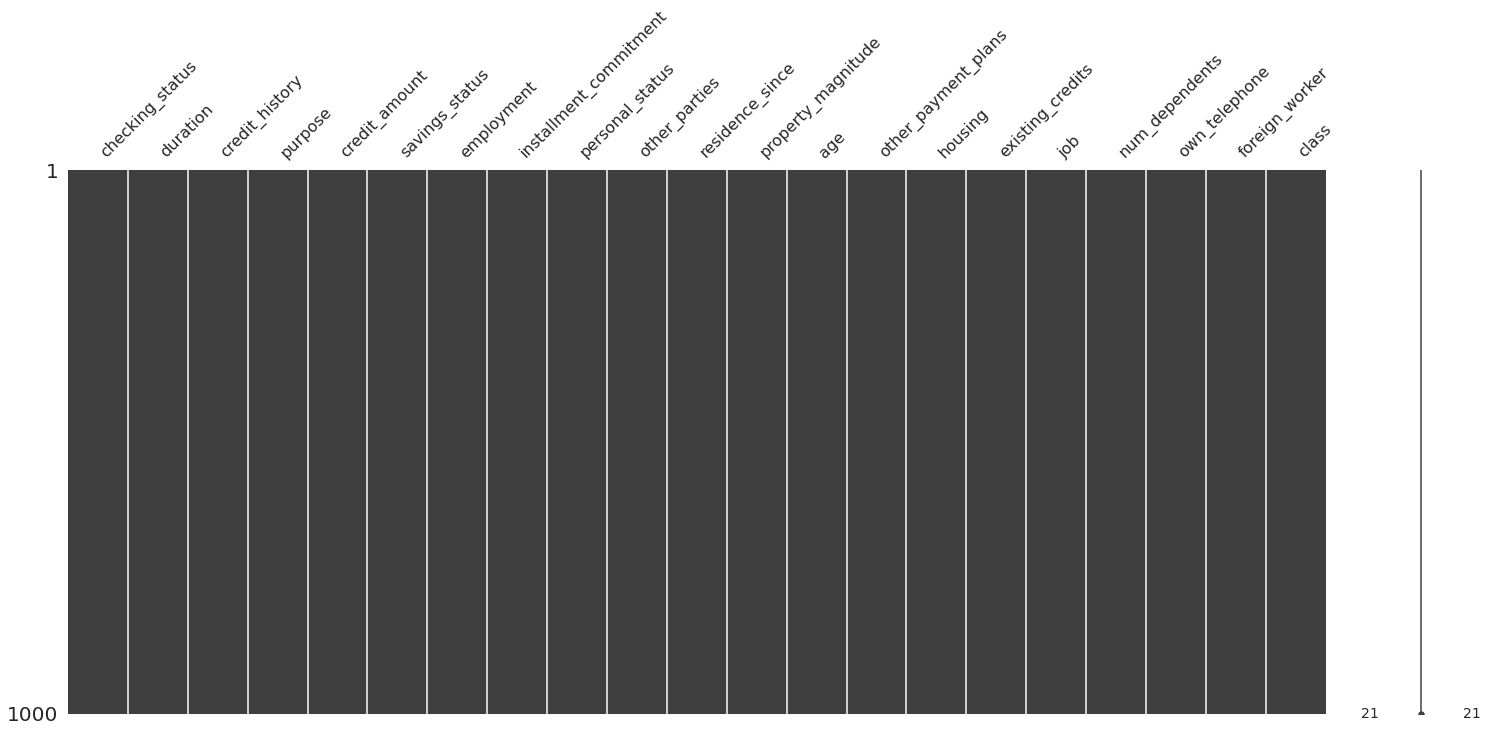

In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df=pd.DataFrame(imp.fit_transform(dataframe))
df.columns=dataframe.columns
df.index=dataframe.index
msno.matrix(df)

### Outliers

Para trabalhar com outliers nesse dataset, escolhemos as colunas com valores númericos para plotar os gráficos e fazer a remoção dos outliers. São elas:


1. duration
2. installment_commitment
3. residence_since
4. age
5. existing_credits
6. num_dependents



In [ ]:
duration = df['duration']
installment_commitment = df['installment_commitment']
residence_since = df['residence_since']
age = df['age']
existing_credits = df['existing_credits']
num_dependents = df['num_dependents']

#### Plotando gráficos

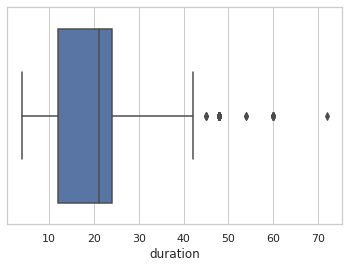

In [ ]:
sns.boxplot(x=duration)

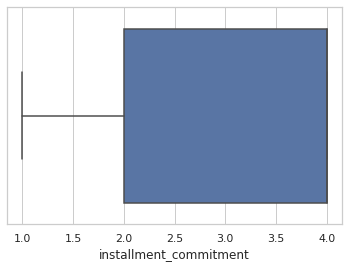

In [ ]:
sns.boxplot(x=installment_commitment)

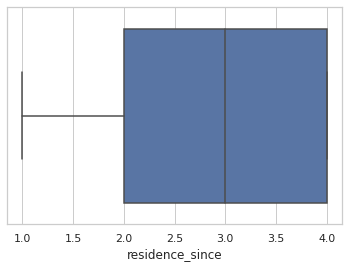

In [ ]:
sns.boxplot(x=residence_since)

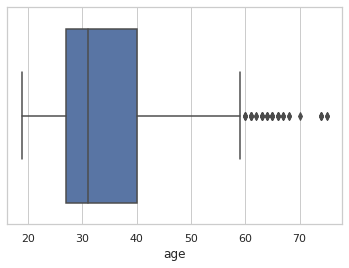

In [ ]:
sns.boxplot(x=age)

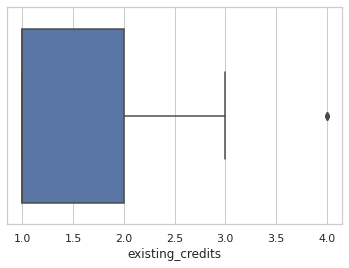

In [ ]:
sns.boxplot(x=existing_credits)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


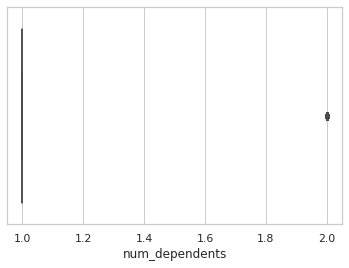

In [ ]:
sns.boxplot(num_dependents)

#### Removendo outliers

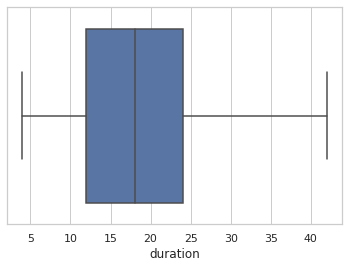

In [ ]:
Q1=duration.quantile(0.25)
Q3=duration.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_duration = duration[~((duration < lowqe_bound) |(duration > upper_bound))]
sns.boxplot(x=IQR_duration)

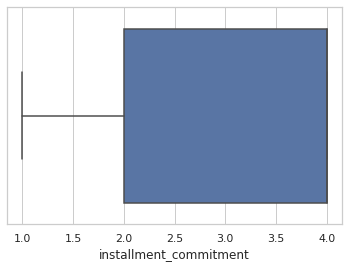

In [ ]:
Q1=installment_commitment.quantile(0.25)
Q3=installment_commitment.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_installment_commitment = installment_commitment[~((installment_commitment < lowqe_bound) |(installment_commitment > upper_bound))]
sns.boxplot(x=IQR_installment_commitment)

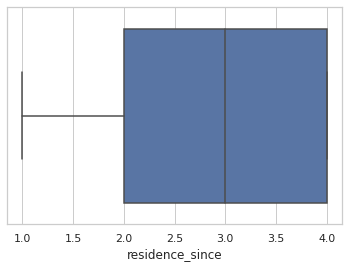

In [ ]:
Q1=residence_since.quantile(0.25)
Q3=residence_since.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_residence_since = residence_since[~((residence_since < lowqe_bound) |(residence_since > upper_bound))]
sns.boxplot(x=IQR_residence_since)

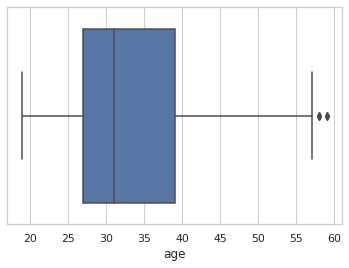

In [ ]:
Q1=age.quantile(0.25)
Q3=age.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_age = age[~((age < lowqe_bound) |(age > upper_bound))]
sns.boxplot(x=IQR_age)

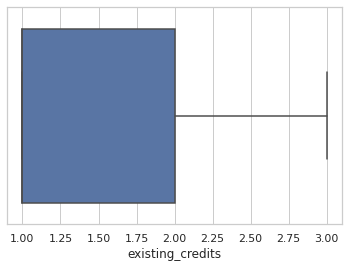

In [ ]:
Q1=existing_credits.quantile(0.25)
Q3=existing_credits.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_existing_credits = existing_credits[~((existing_credits < lowqe_bound) |(existing_credits > upper_bound))]
sns.boxplot(x=IQR_existing_credits)

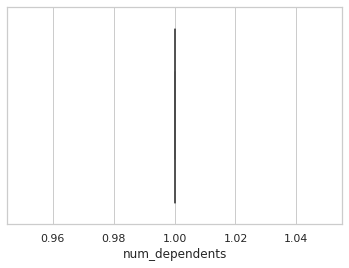

In [ ]:
Q1=num_dependents.quantile(0.25)
Q3=num_dependents.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_num_dependents = num_dependents[~((num_dependents < lowqe_bound) |(num_dependents > upper_bound))]
sns.boxplot(x=IQR_num_dependents)

#### Para desencargo de consciência, faremos a mesma análise dos outliers, só que dessa vez usando o dataset sem preenchimento de missing values.

In [ ]:
duration_ = dataframe['duration']
installment_commitment_ = dataframe['installment_commitment']
residence_since_ = dataframe['residence_since']
age_ = dataframe['age']
existing_credits_ = dataframe['existing_credits']
num_dependents_ = dataframe['num_dependents']

##### Plotando gráficos

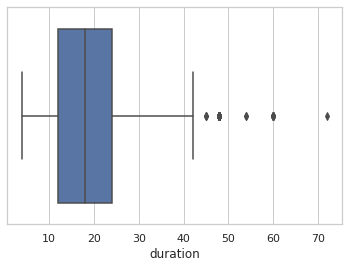

In [ ]:
sns.boxplot(x=duration_)

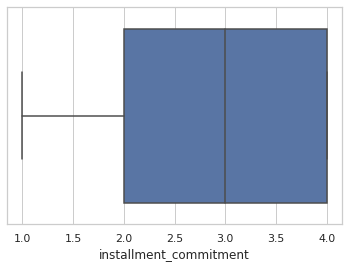

In [ ]:
sns.boxplot(x=installment_commitment_)

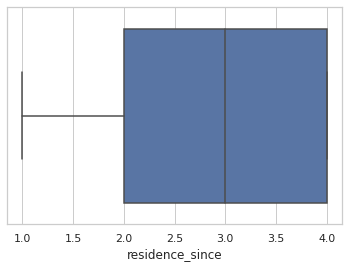

In [ ]:
sns.boxplot(x=residence_since_)

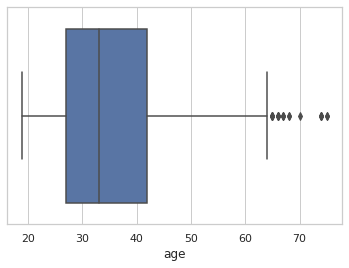

In [ ]:
sns.boxplot(x=age_)

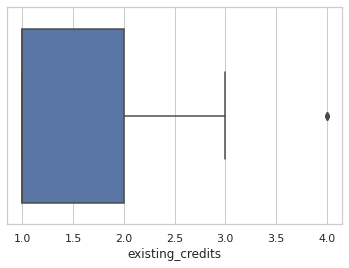

In [ ]:
sns.boxplot(x=existing_credits_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


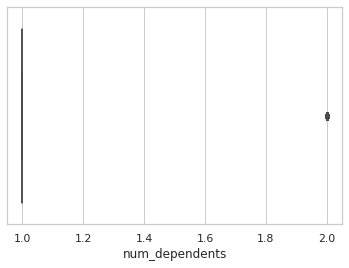

In [ ]:
sns.boxplot(num_dependents_)

##### Removendo outliers

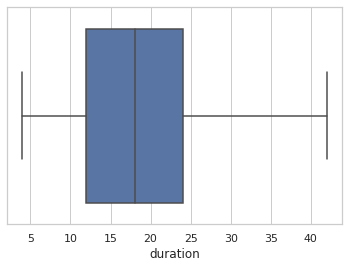

In [ ]:
Q1=duration_.quantile(0.25)
Q3=duration_.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_duration_ = duration_[~((duration_ < lowqe_bound) |(duration_ > upper_bound))]
sns.boxplot(x=IQR_duration_)

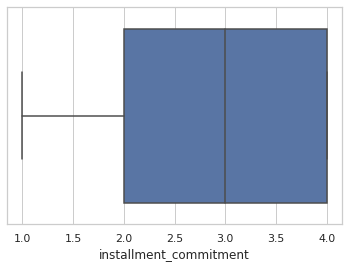

In [ ]:
Q1=installment_commitment_.quantile(0.25)
Q3=installment_commitment_.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_installment_commitment_ = installment_commitment_[~((installment_commitment_ < lowqe_bound) |(installment_commitment_ > upper_bound))]
sns.boxplot(x=IQR_installment_commitment_)

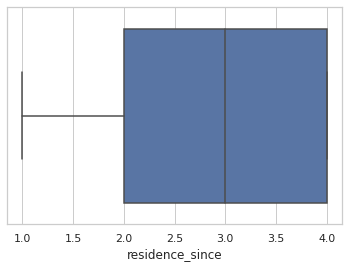

In [ ]:
Q1=residence_since_.quantile(0.25)
Q3=residence_since_.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_residence_since_ = residence_since_[~((residence_since_ < lowqe_bound) |(residence_since_ > upper_bound))]
sns.boxplot(x=IQR_residence_since_)

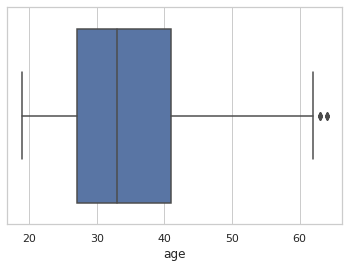

In [ ]:
Q1=age_.quantile(0.25)
Q3=age_.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_age_ = age_[~((age_ < lowqe_bound) |(age_ > upper_bound))]
sns.boxplot(x=IQR_age_)

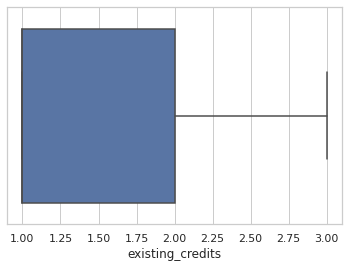

In [ ]:
Q1=existing_credits_.quantile(0.25)
Q3=existing_credits_.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_existing_credits_ = existing_credits_[~((existing_credits_ < lowqe_bound) |(existing_credits_ > upper_bound))]
sns.boxplot(x=IQR_existing_credits_)

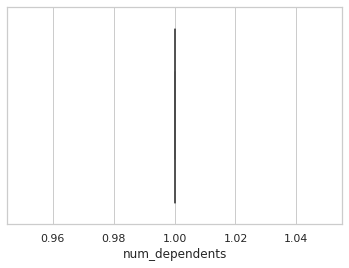

In [ ]:
Q1=num_dependents_.quantile(0.25)
Q3=num_dependents_.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
IQR_num_dependents_ = num_dependents_[~((num_dependents_ < lowqe_bound) |(num_dependents_ > upper_bound))]
sns.boxplot(x=IQR_num_dependents_)

### Outras considerações

Para este dataset, tínhamos uma legenda com uma pequena explicação do que se tratavam os dados nesse [link](https://github.com/renatopp/arff-datasets/blob/master/classification/credit.g.arff), então conseguimos nos entender melhor nas análises.

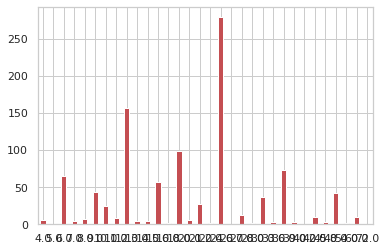

In [ ]:
ax = duration.value_counts(sort=False).plot.bar(rot=0,color='r')
plt.show()

Ao tentar plotar o gráfico da coluna *duration*, percebemos que ele ficou muito confuso e incompreensível, então decidimos englobar os valores em classes menores para facilitar a visualização.

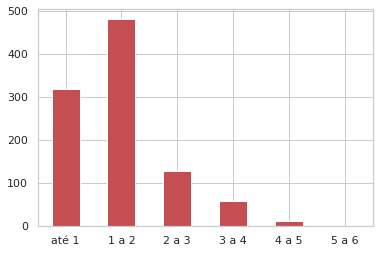

In [ ]:
intervalo = [0, 12, 24, 36, 48, 60, 72]
durationcut = pd.cut(duration, bins=intervalo, labels = [ 'até 1','1 a 2','2 a 3','3 a 4', '4 a 5', '5 a 6'])

ax = durationcut.value_counts(sort=False).plot.bar(rot=0,color='r')
plt.show()

Esta coluna trata do tempo (duração) de crédito dos alemães. Podemos perceber que a contratação de crédito dos alemães se concentra em períodos pequenos, nos intervalos de 0 a 12 meses (até 1) e de 1 a 2 anos (1 a 2)

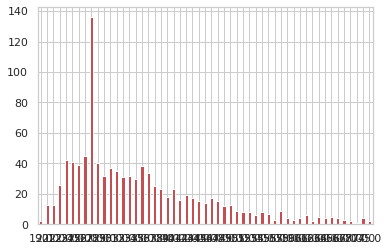

In [ ]:
ax = age.value_counts(sort=False).plot.bar(rot=0,color='r')
plt.show()

O gráfico da idade também ficou bastante confuso, então vamos mais uma vez organizar em blocos menores.

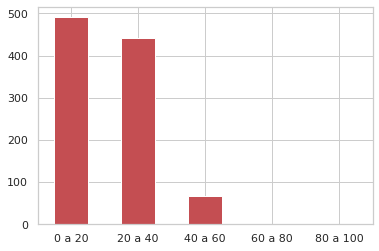

In [ ]:
intervalo = [0, 20, 40, 60, 80, 100]
durationcut = pd.cut(duration, bins=intervalo, labels = [ '0 a 20','20 a 40','40 a 60','60 a 80', '80 a 100'])

ax = durationcut.value_counts(sort=False).plot.bar(rot=0,color='r')
plt.show()

O maior numero de alemães contratantes de linhas de crédito tem entre 0 e 20 anos, seguidos de alemães de 20 a 40 anos.